<a href="https://colab.research.google.com/github/brilianputraa/deepiduav/blob/master/DEEPIDUAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# System Identification of UAV using Deep Learning Methods

<a href="https://github.com/brilianputraa/deepiduav/blob/master/DEEPIDUAV.ipynb" source="blank" ><img src="https://i.ibb.co/6NxqGSF/pinpng-com-github-logo-png-small.png"></a>
    

> As always, don't forget to follow me on github then :)






## Library Installation and Importing

Library employed on this experiment,


*   TensorFlow (Mainly Keras for higher level approach and fast implementation)
*   Matplotlib
*   NumPy
*   csv (To read the dataset file)
*   os







In [ ]:
#@title Install requirements (skip this if you already installed these) { form-width: "40%" }

!pip install tensorflow
!pip install matplotlib
!pip install numpy

In [ ]:
#@title Import the Library { form-width: "40%" }

from google.colab import drive
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import os

## Dataset Preparation

In this experiment, the flight data of UAV (Quadcopter) were obtained from [Parrot Mambo Fly drone](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwifqLmu25nrAhWFzjgGHWJhAwwQFjAMegQIAxAB&url=https%3A%2F%2Fwww.parrot.com%2Flu%2Fen%2Fdrones%2Fparrot-mambo-fly&usg=AOvVaw28udjmYIYC7AmXBK7rfiI7).

The data acquisition was processed using [MATLAB Support Package for Parrot Drones](https://www.mathworks.com/help/supportpkg/parrotio/referencelist.html?type=function&listtype=cat&category=index&blocktype=all&capability=&s_tid=CRUX_lftnav), the flight data were collected directly when the drone was hovering. By utilizing the support package we can collect the UAV flight data such as the UAV attitude orientation, each motor speed, etcetera in real-time.



In [ ]:
drive.mount('/content/gdrive')
dataset_dir = 'gdrive/My Drive/My Research/NEW 2020'
main_dir = dataset_dir

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# url_data = ''
# url_data1 = 'https://github.com/brilianputraa/deepiduav/blob/master/datasetfirst.csv'
# url_data2 = 'https://github.com/brilianputraa/deepiduav/blob/master/datasetsecond.csv'

# Load the dataset directly from drive

# Data preprocessing (Normalize the data with Min-Max)
normalize = MinMaxScaler()

# First Data
datafirst = pd.read_csv(os.path.join(dataset_dir, 'datasetfirstnamed.csv'))

# Time stamp
time = np.array(datafirst['Time'])

col_name1 = datafirst.columns
datafirst = normalize.fit_transform(np.array(datafirst))
datafirst = pd.DataFrame(datafirst)
datafirst.rename(columns={0:'Time',
                          1:'Total Thrust (k)',
                          2:'Total Thrust (k-1)',
                          3:'Altitude delayed (m)'}, 
                 inplace=True)

# Second Dataset
datasecond = pd.read_csv(os.path.join(dataset_dir, 'datasetsecondnamed.csv'))
col_name2 = datasecond.columns
datasecond = normalize.fit_transform(np.array(datafirst))
datasecond = pd.DataFrame(datafirst)
datasecond.rename(columns={0:'Time',
                          1:'Thrust 1 (k)',
                          2:'Thrust 2 (k)',
                          3:'Thrust 3 (k)',
                          4:'Thrust 4 (k)',
                          5:'Thrust 1 (k-1)',
                          6:'Thrust 2 (k-1)',
                          7:'Thrust 3 (k-1)',
                          8:'Thrust 4 (k-1)',
                          9:'Vel_pitch (k-1)',
                          10:'Vel_roll (k-1)'
                           }, 
                 inplace=True)

# Separate the input and output for each data
datafirstinput = np.array(datafirst.iloc[:,1:4]) # Second and third column (Total Thrust, Total Thrust Delayed)
datasecondinput = np.array(datasecond.iloc[:,1:13]) # 2-12 Column Number (All Thrust + Delayed Thrust, Angular Velocity Delayed) 
datafirstoutput = np.array(datafirst.iloc[:,-1:]) # last column (Altitude)
datasecondoutput = np.array(datasecond.iloc[:,-3:]) # third last column (angular velocity) 


### Training and Test Set Split


In [ ]:
# In this experiment the dataset is splitted into 80 and 20 % proportion

# Training and test set 

xtrain1, xtest1, ytrain1, ytest1 = train_test_split(datafirstinput, datafirstoutput, test_size = 0.2)

xtrain2, xtest2, ytrain2, ytest2 = train_test_split(datasecondinput, datasecondoutput, test_size = 0.2)

data_length = datafirstinput.shape[0]
data_train = xtrain1.shape[0]
rest = data_length - data_train
time_train =  time[:data_train]
time_test = time[data_train:]

# Convert to Tensor
xtrain1_tsr = xtrain1.reshape(xtrain1.shape[0], xtrain1.shape[1], 1)
xtest1_tsr = xtest1.reshape(xtest1.shape[0], xtest1.shape[1], 1)
xtrain2_tsr = xtrain2.reshape(xtrain2.shape[0], xtrain2.shape[1], 1)
xtest2_tsr = xtest2.reshape(xtest2.shape[0], xtest2.shape[1], 1)

# Training Parameter
batch_size = 32

# First case
input_dim1 = (xtrain1_tsr.shape[1], xtrain1_tsr.shape[2])
output_dim1 = ytrain1.shape[1]

# Second case
input_dim2 = (xtrain2_tsr.shape[1], xtrain2_tsr.shape[2])
output_dim2 = ytrain2.shape[1]


## The Identification Block Diagram

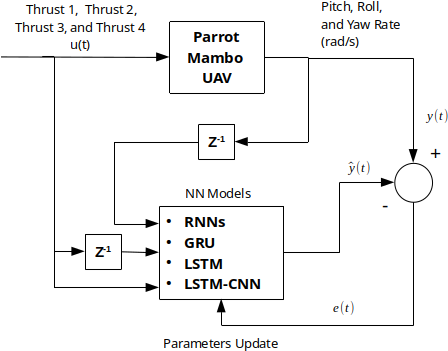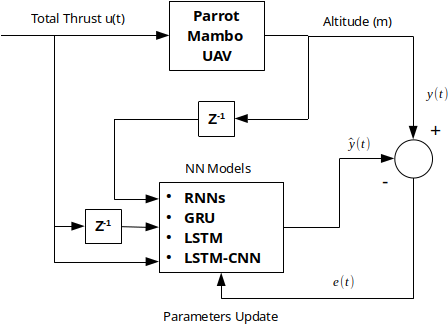

## The Identification Process

### DNN Model First Case

In [ ]:
in_dim = (xtrain1_tsr.shape[1], xtrain1_tsr.shape[2])

#### Vanilla Deep Neural Networks

In [ ]:
dnns = tf.keras.models.Sequential([
  tf.keras.layers.Dense(30, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'relu'),
  tf.keras.layers.Lambda(lambda x: x*10)                                 
]) 

#### RNNs (Recurrent Neural Networks)

In [ ]:
rnns = tf.keras.models.Sequential([
  tf.keras.layers.SimpleRNN(30, input_shape = in_dim, return_sequences = True),
  tf.keras.layers.SimpleRNN(20, return_sequences = None),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x*1)
])

rnns.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 4, 30)             960       
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 20)                1020      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 21        
_________________________________________________________________
lambda_14 (Lambda)           (None, 1)                 0         
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


#### Gated Recurrent Unit (GRU)

In [ ]:
gru = tf.keras.models.Sequential([
  tf.keras.layers.GRU(30, input_shape = in_dim, return_sequences = True),
  tf.keras.layers.GRU(20, return_sequences = None),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x*1)
])

gru.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 4, 30)             2970      
_________________________________________________________________
gru_7 (GRU)                  (None, 20)                3120      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 21        
_________________________________________________________________
lambda_15 (Lambda)           (None, 1)                 0         
Total params: 6,111
Trainable params: 6,111
Non-trainable params: 0
_________________________________________________________________


#### Long Short Term Memory (LSTM)

In [ ]:
lstm = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(30, input_shape = in_dim, return_sequences = True),
  tf.keras.layers.LSTM(10, return_sequences = None),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x*1)
])

lstm.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 4, 30)             3840      
_________________________________________________________________
lstm_13 (LSTM)               (None, 10)                1640      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
_________________________________________________________________
lambda_16 (Lambda)           (None, 1)                 0         
Total params: 5,491
Trainable params: 5,491
Non-trainable params: 0
_________________________________________________________________


#### CNN + LSTM

In [ ]:
lstmcnn = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters = 32, kernel_size = 2, strides = 1, activation = 'relu', input_shape = in_dim),                                 
  tf.keras.layers.LSTM(30, return_sequences = True),
  tf.keras.layers.LSTM(10, return_sequences = None),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x*1)
])

lstmcnn.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 3, 32)             96        
_________________________________________________________________
lstm_14 (LSTM)               (None, 3, 30)             7560      
_________________________________________________________________
lstm_15 (LSTM)               (None, 10)                1640      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 11        
_________________________________________________________________
lambda_17 (Lambda)           (None, 1)                 0         
Total params: 9,307
Trainable params: 9,307
Non-trainable params: 0
_________________________________________________________________


#### Hyperparameter and Optimizer Select

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr = 1e-4, momentum = 0.9)
epoch_num = 75

def callbacks(checkpoint_path):
  cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=2)
  return cp_callback

# DNN
dnns.compile(loss = tf.keras.losses.Huber(),
             optimizer = optimizer,
             metrics = ["mse"])
# RNNs
rnns.compile(loss = tf.keras.losses.Huber(),
             optimizer = optimizer,
             metrics = ["mse"])
# GRU
gru.compile(loss = tf.keras.losses.Huber(),
             optimizer = optimizer,
             metrics = ["mse"])
# LSTM
lstm.compile(loss = tf.keras.losses.Huber(),
             optimizer = optimizer,
             metrics = ["mse"])
# CNN + LSTM
lstmcnn.compile(loss = tf.keras.losses.Huber(),
             optimizer = optimizer,
             metrics = ["mse"])

# Training History
checkpoint_filepath1 = main_dir + '/Model Trained/' + "dnns.hdf5"
cp_callback = callbacks(checkpoint_filepath1)
history1 = dnns.fit(xtrain1, ytrain1, batch_size, epochs= epoch_num, shuffle = False, verbose = 2, callbacks = [cp_callback])
checkpoint_filepath1 = main_dir + '/Model Trained/' + "rnns.hdf5"
cp_callback = callbacks(checkpoint_filepath1)
history2 = rnns.fit(xtrain1_tsr, ytrain1, batch_size, epochs = epoch_num, shuffle = False, verbose = 2, callbacks = [cp_callback])
checkpoint_filepath1 = main_dir + '/Model Trained/' + "gru.hdf5"
cp_callback = callbacks(checkpoint_filepath1)
history3 = gru.fit(xtrain1_tsr, ytrain1, batch_size, epochs = epoch_num, shuffle = False, verbose = 2, callbacks = [cp_callback])
checkpoint_filepath1 = main_dir + '/Model Trained/' + "lstm.hdf5"
cp_callback = callbacks(checkpoint_filepath1)
history4 = lstm.fit(xtrain1_tsr, ytrain1, batch_size, epochs = epoch_num, shuffle = False, verbose = 2, callbacks = [cp_callback])
checkpoint_filepath1 = main_dir + '/Model Trained/' + "lstmcnn.hdf5"
cp_callback = callbacks(checkpoint_filepath1)
history5 = lstmcnn.fit(xtrain1_tsr, ytrain1, batch_size, epochs = epoch_num, shuffle = False, verbose = 2, callbacks = [cp_callback]) 

Epoch 1/75

Epoch 00001: saving model to gdrive/My Drive/My Research/NEW 2020/Model Trained/dnns.hdf5
477/477 - 1s - loss: 1.6551e-04 - mse: 3.3102e-04
Epoch 2/75

Epoch 00002: saving model to gdrive/My Drive/My Research/NEW 2020/Model Trained/dnns.hdf5
477/477 - 1s - loss: 1.6371e-04 - mse: 3.2742e-04
Epoch 3/75

Epoch 00003: saving model to gdrive/My Drive/My Research/NEW 2020/Model Trained/dnns.hdf5
477/477 - 1s - loss: 1.6202e-04 - mse: 3.2404e-04
Epoch 4/75

Epoch 00004: saving model to gdrive/My Drive/My Research/NEW 2020/Model Trained/dnns.hdf5
477/477 - 1s - loss: 1.6042e-04 - mse: 3.2084e-04
Epoch 5/75

Epoch 00005: saving model to gdrive/My Drive/My Research/NEW 2020/Model Trained/dnns.hdf5
477/477 - 1s - loss: 1.5907e-04 - mse: 3.1814e-04
Epoch 6/75

Epoch 00006: saving model to gdrive/My Drive/My Research/NEW 2020/Model Trained/dnns.hdf5
477/477 - 1s - loss: 1.5786e-04 - mse: 3.1571e-04
Epoch 7/75

Epoch 00007: saving model to gdrive/My Drive/My Research/NEW 2020/Model Trai

##### Learning Rate Scheduler

### DNN Model Second Case

In [ ]:
in_dim = (xtrain2_tsr.shape[1], xtrain2_tsr.shape[2])

#### Vanilla Deep Neural Networks

In [ ]:
dnns1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(30, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'relu'),
  tf.keras.layers.Dense(3, activation = 'relu'),
  tf.keras.layers.Lambda(lambda x: x*10)                                 
]) 

#### RNNs (Recurrent Neural Networks)

In [ ]:
rnns1 = tf.keras.models.Sequential([
  tf.keras.layers.SimpleRNN(30, input_shape = in_dim, return_sequences = True),
  tf.keras.layers.SimpleRNN(20, return_sequences = None),
  tf.keras.layers.Dense(3),
  tf.keras.layers.Lambda(lambda x: x*1, output_shape = [None, 3])
])

rnns1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 4, 30)             960       
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 63        
_________________________________________________________________
lambda_10 (Lambda)           (None, 3)                 0         
Total params: 2,043
Trainable params: 2,043
Non-trainable params: 0
_________________________________________________________________


#### Gated Recurrent Unit (GRU)

In [ ]:
gru1 = tf.keras.models.Sequential([
  tf.keras.layers.GRU(30, input_shape = in_dim, return_sequences = True),
  tf.keras.layers.GRU(20, return_sequences = None),
  tf.keras.layers.Dense(3),
  tf.keras.layers.Lambda(lambda x: x*1, output_shape = [None, 3])
])

gru1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 4, 30)             2970      
_________________________________________________________________
gru_5 (GRU)                  (None, 20)                3120      
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 63        
_________________________________________________________________
lambda_11 (Lambda)           (None, 3)                 0         
Total params: 6,153
Trainable params: 6,153
Non-trainable params: 0
_________________________________________________________________


#### Long Short Term Memory (LSTM)

In [ ]:
lstm1 = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(30, input_shape = in_dim, return_sequences = True),
  tf.keras.layers.LSTM(10, return_sequences = None),
  tf.keras.layers.Dense(3),
  tf.keras.layers.Lambda(lambda x: x*1, output_shape = [None, 3])
])

lstm1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 4, 30)             3840      
_________________________________________________________________
lstm_9 (LSTM)                (None, 10)                1640      
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 33        
_________________________________________________________________
lambda_12 (Lambda)           (None, 3)                 0         
Total params: 5,513
Trainable params: 5,513
Non-trainable params: 0
_________________________________________________________________


#### CNN + LSTM

In [ ]:
lstmcnn1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters = 32, kernel_size = 2, strides = 1, activation = 'relu', input_shape = in_dim),                                 
  tf.keras.layers.LSTM(30, return_sequences = True),
  tf.keras.layers.LSTM(10, return_sequences = None),
  tf.keras.layers.Dense(3),
  tf.keras.layers.Lambda(lambda x: x*1, output_shape = [None, 3])
])

lstmcnn1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 3, 32)             96        
_________________________________________________________________
lstm_10 (LSTM)               (None, 3, 30)             7560      
_________________________________________________________________
lstm_11 (LSTM)               (None, 10)                1640      
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 33        
_________________________________________________________________
lambda_13 (Lambda)           (None, 3)                 0         
Total params: 9,329
Trainable params: 9,329
Non-trainable params: 0
_________________________________________________________________


#### Hyperparameter and Optimizer Select

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr = 1e-4, momentum = 0.9)

# DNN
dnns1.compile(loss = tf.keras.losses.Huber(),
             optimizer = optimizer,
             metrics = ["mse"])
# RNNs
rnns1.compile(loss = tf.keras.losses.Huber(),
             optimizer = optimizer,
             metrics = ["mse"])
# GRU
gru1.compile(loss = tf.keras.losses.Huber(),
             optimizer = optimizer,
             metrics = ["mse"])
# LSTM
lstm1.compile(loss = tf.keras.losses.Huber(),
             optimizer = optimizer,
             metrics = ["mse"])
# CNN + LSTM
lstmcnn1.compile(loss = tf.keras.losses.Huber(),
             optimizer = optimizer,
             metrics = ["mse"])

# Training History
checkpoint_filepath1 = main_dir + '/Model Trained/' + "dnns1.hdf5"
cp_callback = callbacks(checkpoint_filepath1)
# history6 = dnns1.fit(xtrain2_tsr, ytrain2, batch_size, epochs= epoch_num, shuffle = False, verbose = 2, callbacks = [cp_callback])
checkpoint_filepath1 = main_dir + '/Model Trained/' + "rnns1.hdf5"
cp_callback = callbacks(checkpoint_filepath1)
history7 = rnns1.fit(xtrain2_tsr, ytrain2, batch_size, epochs = epoch_num, shuffle = False, verbose = 2, callbacks = [cp_callback])
checkpoint_filepath1 = main_dir + '/Model Trained/' + "gru1.hdf5"
cp_callback = callbacks(checkpoint_filepath1)
history8 = gru1.fit(xtrain2_tsr, ytrain2, batch_size, epochs = epoch_num, shuffle = False, verbose = 2, callbacks = [cp_callback])
checkpoint_filepath1 = main_dir + '/Model Trained/' + "lstm1.hdf5"
cp_callback = callbacks(checkpoint_filepath1)
history9 = lstm1.fit(xtrain2_tsr, ytrain2, batch_size, epochs = epoch_num, shuffle = False, verbose = 2, callbacks = [cp_callback])
checkpoint_filepath1 = main_dir + '/Model Trained/' + "lstmcnn1.hdf5"
cp_callback = callbacks(checkpoint_filepath1)
history10 = lstmcnn1.fit(xtrain2_tsr, ytrain2, batch_size, epochs = epoch_num, shuffle = False, verbose = 2, callbacks = [cp_callback]) 

Epoch 1/75

Epoch 00001: saving model to gdrive/My Drive/My Research/NEW 2020/Model Trained/rnns1.hdf5
477/477 - 4s - loss: 0.0202 - mse: 0.0404
Epoch 2/75

Epoch 00002: saving model to gdrive/My Drive/My Research/NEW 2020/Model Trained/rnns1.hdf5
477/477 - 4s - loss: 0.0011 - mse: 0.0021
Epoch 3/75

Epoch 00003: saving model to gdrive/My Drive/My Research/NEW 2020/Model Trained/rnns1.hdf5
477/477 - 4s - loss: 0.0010 - mse: 0.0021
Epoch 4/75

Epoch 00004: saving model to gdrive/My Drive/My Research/NEW 2020/Model Trained/rnns1.hdf5
477/477 - 4s - loss: 9.9835e-04 - mse: 0.0020
Epoch 5/75

Epoch 00005: saving model to gdrive/My Drive/My Research/NEW 2020/Model Trained/rnns1.hdf5
477/477 - 4s - loss: 9.7057e-04 - mse: 0.0019
Epoch 6/75

Epoch 00006: saving model to gdrive/My Drive/My Research/NEW 2020/Model Trained/rnns1.hdf5
477/477 - 3s - loss: 9.4360e-04 - mse: 0.0019
Epoch 7/75

Epoch 00007: saving model to gdrive/My Drive/My Research/NEW 2020/Model Trained/rnns1.hdf5
477/477 - 3s - 

##### Learning Rate Scheduler

## The Results

In [ ]:
def model_forecast(model, series):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.flat_map(lambda w: tf.data.Dataset.from_tensor_slices(w))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

def plot_series(time, series, label, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format, label = label)
    plt.xlabel("Time (s)")
    plt.ylabel("Value")
    plt.grid(True)    

### First Identification Case

In [ ]:
data_test = data_length - data_train

# each model forecast on training data
# dnn_forecast = dnns.predict(xtrain1_tsr)
rnn_forecast = rnns.predict(xtrain1_tsr)
gru_forecast = gru.predict(xtrain1_tsr)
lstm_forecast = lstm.predict(xtrain1_tsr)
lstmcnn_forecast = lstmcnn.predict(xtrain1_tsr)

# each model forecast on test data
# dnn_forecast_test = dnns.predict(xtest1_tsr)
rnn_forecast_test = rnns.predict(xtest1_tsr)
gru_forecast_test = gru.predict(xtest1_tsr)
lstm_forecast_test = lstm.predict(xtest1_tsr)
lstmcnn_forecast_test = lstmcnn.predict(xtest1_tsr)

#### Altitude

##### Training Data

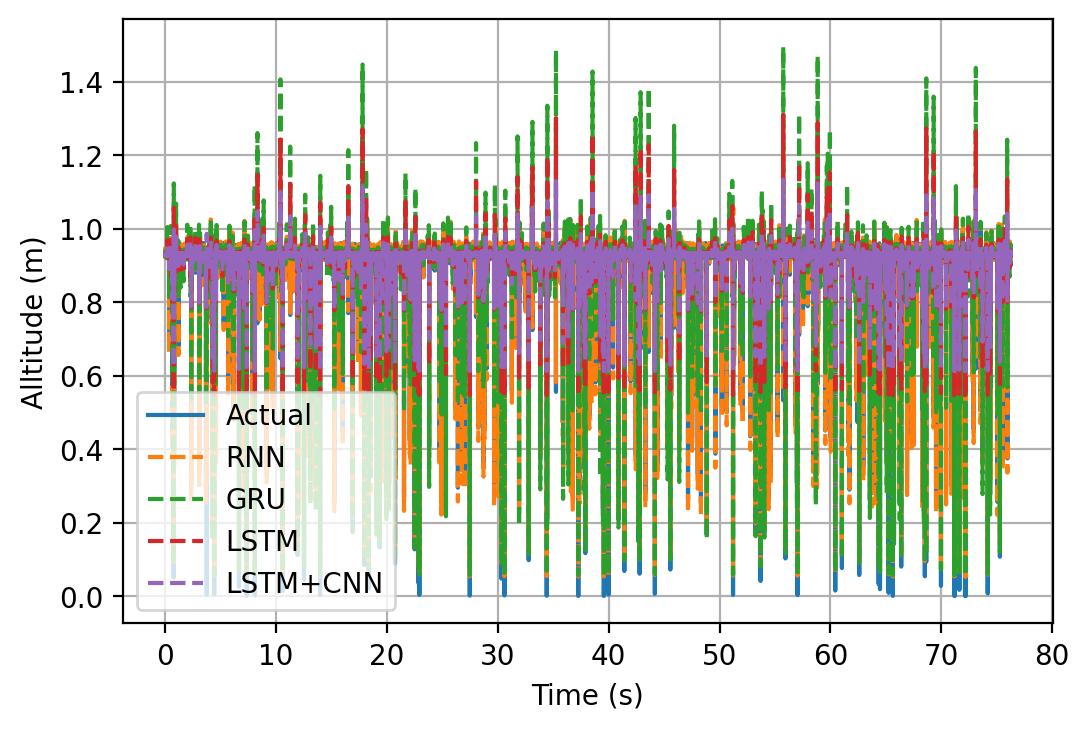

In [ ]:
plt.figure(dpi = 200)
plot_series(time_train, ytrain1, 'Actual')
# plot_series(time_train, dnn_forecast)
plot_series(time_train, rnn_forecast, 'RNN', '--')
plot_series(time_train, gru_forecast, 'GRU', '--')
plot_series(time_train, lstm_forecast, 'LSTM', '--')
plot_series(time_train, lstmcnn_forecast, 'LSTM+CNN', '--')
plt.ylabel('Alltitude (m)')
plt.legend()

##### Test Data

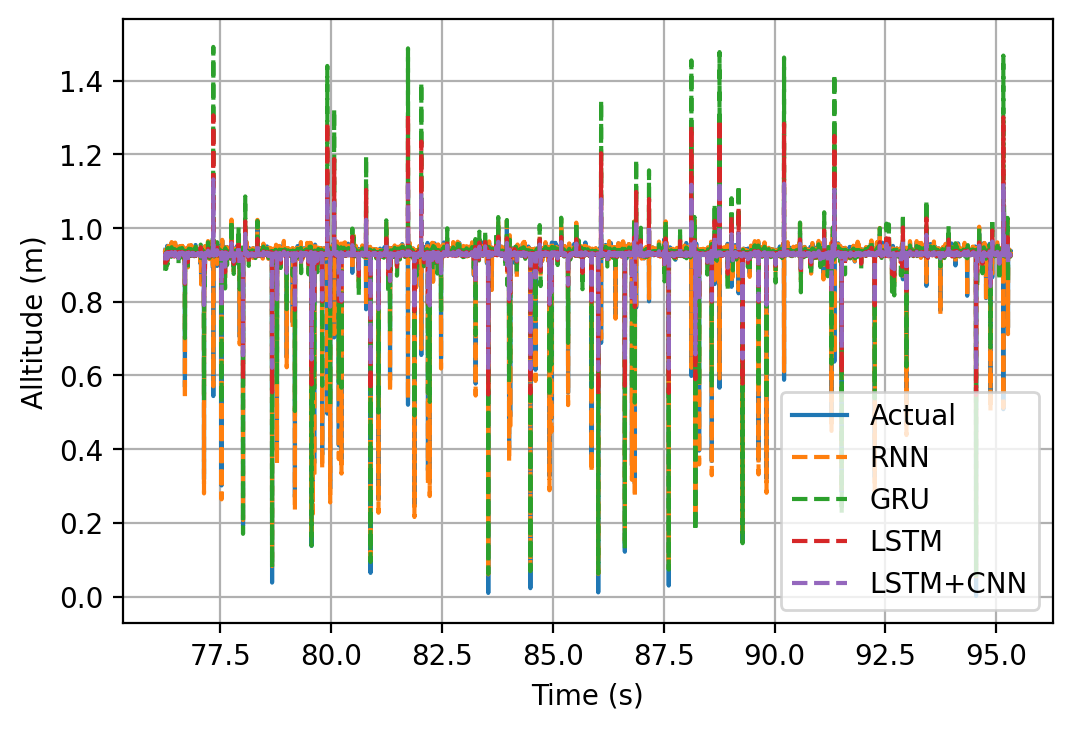

In [ ]:
plt.figure(dpi = 200)
plot_series(time_test, ytest1, 'Actual')
# plot_series(time_test, dnn_forecast_test)
plot_series(time_test, rnn_forecast_test, 'RNN', '--')
plot_series(time_test, gru_forecast_test, 'GRU', '--')
plot_series(time_test, lstm_forecast_test, 'LSTM', '--')
plot_series(time_test, lstmcnn_forecast_test, 'LSTM+CNN', '--')
plt.ylabel('Alltitude (m)')
plt.legend()

#### Metrics

In [ ]:
# Training Data
# mae_dnn = tf.keras.metrics.mean_absolute_error(xtrain1, dnn_forecast).numpy()
mae_rnn = np.mean(tf.keras.metrics.mean_absolute_error(ytrain1, rnn_forecast).numpy())
mae_gru = np.mean(tf.keras.metrics.mean_absolute_error(ytrain1, gru_forecast).numpy())
mae_lstm = np.mean(tf.keras.metrics.mean_absolute_error(ytrain1, lstm_forecast).numpy())
mae_lstmcnn = np.mean(tf.keras.metrics.mean_absolute_error(ytrain1, lstmcnn_forecast).numpy())

# mse_dnn = tf.keras.metrics.mean_squared_error(xtrain1, dnn_forecast).numpy()
mse_rnn = np.mean(tf.keras.metrics.mean_squared_error(ytrain1, rnn_forecast).numpy())
mse_gru = np.mean(tf.keras.metrics.mean_squared_error(ytrain1, gru_forecast).numpy())
mse_lstm = np.mean(tf.keras.metrics.mean_squared_error(ytrain1, lstm_forecast).numpy())
mse_lstmcnn = np.mean(tf.keras.metrics.mean_squared_error(ytrain1, lstmcnn_forecast).numpy())

print('Training Data MAE'),
print(f'RNN : {mae_rnn}, GRU : {mae_gru}, LSTM : {mae_lstm}, LSTM+CNN : {mae_lstmcnn}'),
print('Training Data MSE'),
print(f'RNN : {mse_rnn}, GRU : {mse_gru}, LSTM : {mse_lstm}, LSTM+CNN : {mse_lstmcnn}'),

# Test Data
# mae_dnn_test = tf.keras.metrics.mean_absolute_error(xtest1, dnn_forecast_test).numpy()
mae_rnn_test = np.mean(tf.keras.metrics.mean_absolute_error(ytest1, rnn_forecast_test).numpy())
mae_gru_test = np.mean(tf.keras.metrics.mean_absolute_error(ytest1, gru_forecast_test).numpy())
mae_lstm_test = np.mean(tf.keras.metrics.mean_absolute_error(ytest1, lstm_forecast_test).numpy())
mae_lstmcnn_test = np.mean(tf.keras.metrics.mean_absolute_error(ytest1, lstmcnn_forecast_test).numpy())

# mse_dnn_test = tf.keras.metrics.mean_squared_error(xtest1, dnn_forecast_test).numpy()
mse_rnn_test = np.mean(tf.keras.metrics.mean_squared_error(ytest1, rnn_forecast_test).numpy())
mse_gru_test = np.mean(tf.keras.metrics.mean_squared_error(ytest1, gru_forecast_test).numpy())
mse_lstm_test = np.mean(tf.keras.metrics.mean_squared_error(ytest1, lstm_forecast_test).numpy())
mse_lstmcnn_test = np.mean(tf.keras.metrics.mean_squared_error(ytest1, lstmcnn_forecast_test).numpy())

print('Testing Data MAE'),
print(f'RNN : {mae_rnn_test}, GRU : {mae_gru_test}, LSTM : {mae_lstm_test}, LSTM+CNN : {mae_lstmcnn_test}'),
print('Testing Data MSE'),
print(f'RNN : {mse_rnn_test}, GRU : {mse_gru_test}, LSTM : {mse_lstm_test}, LSTM+CNN : {mse_lstmcnn_test}')

Training Data MAE
RNN : 0.009572773240506649, GRU : 0.020238077268004417, LSTM : 0.022255554795265198, LSTM+CNN : 0.021622171625494957
Training Data MSE
RNN : 0.0010107056004926562, GRU : 0.005310967564582825, LSTM : 0.006589444819837809, LSTM+CNN : 0.006205481011420488
Testing Data MAE
RNN : 0.010217899456620216, GRU : 0.019686968997120857, LSTM : 0.02141662687063217, LSTM+CNN : 0.02085038088262081
Testing Data MSE
RNN : 0.0014263394987210631, GRU : 0.004823644645512104, LSTM : 0.005769925657659769, LSTM+CNN : 0.005470141768455505


### Second Identification Case

In [ ]:
# each model forecast on training data
# dnn_forecast1 = dnns.predict(xtrain2_tsr)
rnn_forecast1 = rnns1.predict(xtrain2_tsr)
gru_forecast1 = gru1.predict(xtrain2_tsr)
lstm_forecast1 = lstm1.predict(xtrain2_tsr)
lstmcnn_forecast1 = lstmcnn1.predict(xtrain2_tsr)

# each model forecast on test data
# dnn_forecast1_test = dnns.predict(xtest2_tsr)
rnn_forecast1_test = rnns1.predict(xtest2_tsr)
gru_forecast1_test = gru1.predict(xtest2_tsr)
lstm_forecast1_test = lstm1.predict(xtest2_tsr)
lstmcnn_forecast1_test = lstmcnn1.predict(xtest2_tsr)


#### Roll Velocity

##### Training Data

(3814, 3)

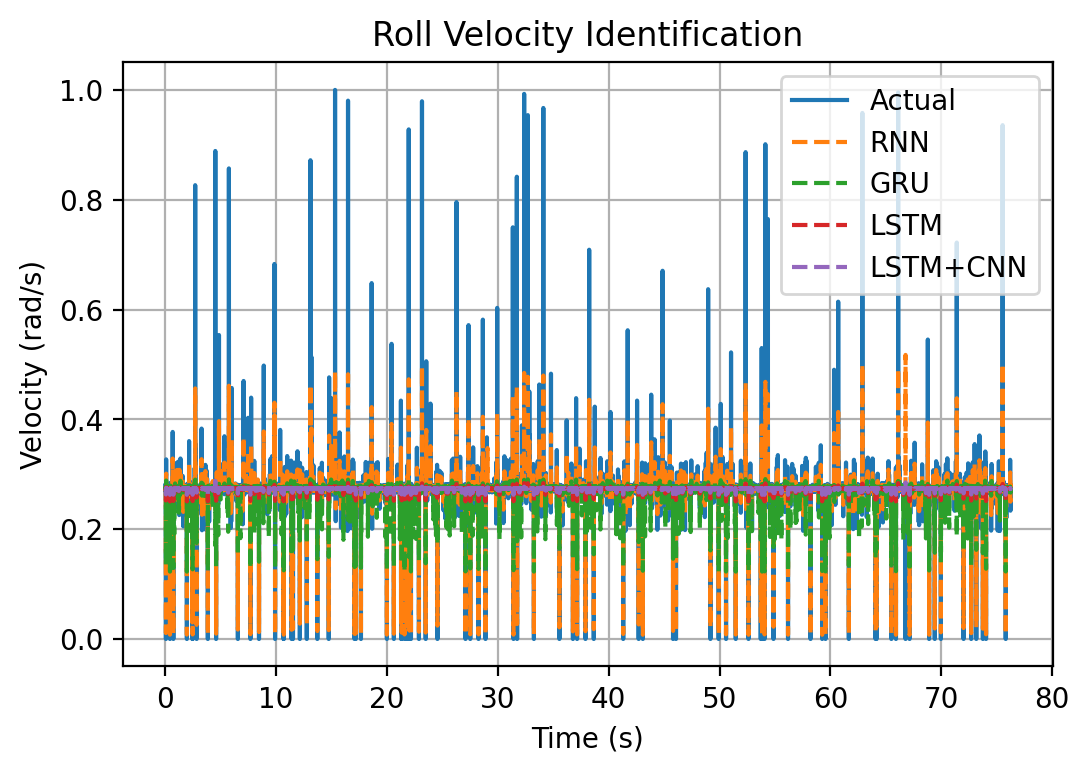

In [ ]:
plt.figure(dpi = 200)
plt.title('Roll Velocity Identification')
plot_series(time_train, ytrain2[:,0], 'Actual')
# plot_series(time_test, np.squeeze(dnn_forecast[:,1))
plot_series(time_train, rnn_forecast1[:,0], 'RNN', '--')
plot_series(time_train, gru_forecast1[:,0], 'GRU', '--')
plot_series(time_train, lstm_forecast1[:,0], 'LSTM', '--')
plot_series(time_train, lstmcnn_forecast1[:,0], 'LSTM+CNN', '--')
plt.ylabel('Velocity (rad/s)')
plt.legend()
rnn_forecast1_test.shape

##### Test Data

(3814, 3)

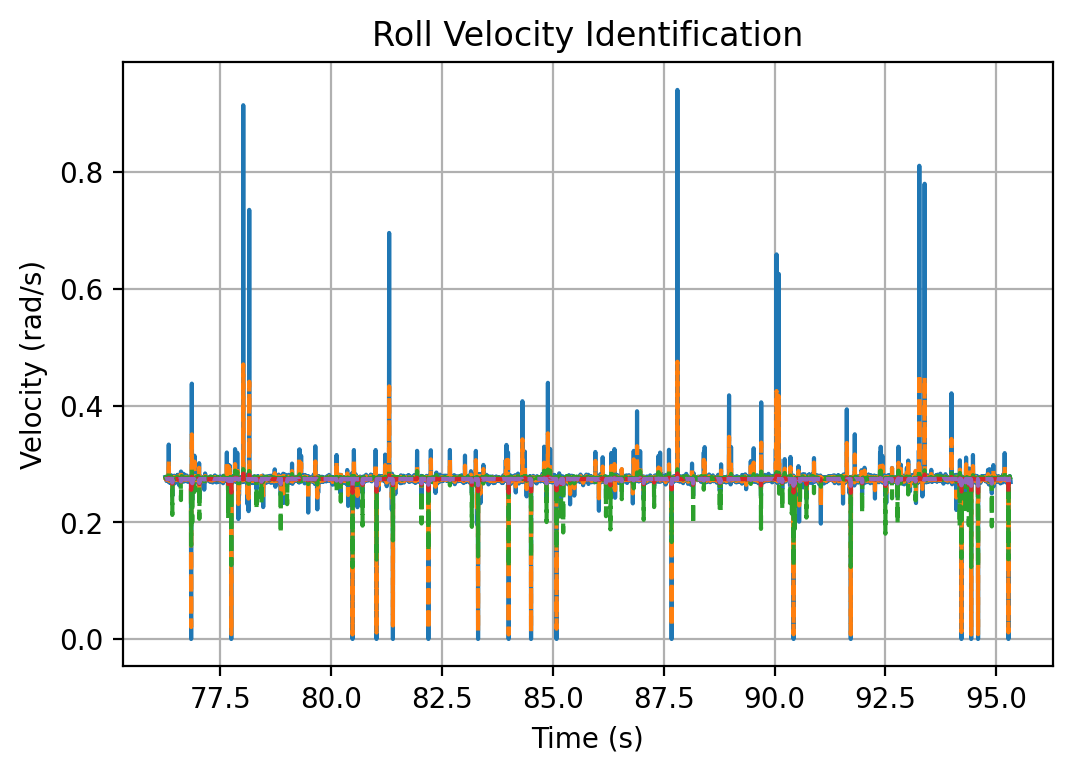

In [ ]:
plt.figure(dpi = 200)
plt.title('Roll Velocity Identification')
plot_series(time_test, ytest2[:,0], 'Actual')
# plot_series(time_test, np.squeeze(dnn_forecast[:,1))
plot_series(time_test, rnn_forecast1_test[:,0], 'RNN', '--')
plot_series(time_test, gru_forecast1_test[:,0], 'GRU', '--')
plot_series(time_test, lstm_forecast1_test[:,0], 'LSTM', '--')
plot_series(time_test, lstmcnn_forecast1_test[:,0], 'LSTM+CNN', '--')
plt.ylabel('Velocity (rad/s)')
np.asarray(rnn_forecast1_test).shape

#### Metrics

In [ ]:
# Training Data
# mae_dnn1 = tf.keras.metrics.mean_absolute_error(xtrain2[:,0], dnn_forecast[:,0]).numpy()
mae_rnn1 = tf.keras.metrics.mean_absolute_error(ytrain2[:,0], rnn_forecast1[:,0]).numpy()
mae_gru1 = tf.keras.metrics.mean_absolute_error(ytrain2[:,0], gru_forecast1[:,0]).numpy()
mae_lstm1 = tf.keras.metrics.mean_absolute_error(ytrain2[:,0], lstm_forecast1[:,0]).numpy()
mae_lstmcnn1 = tf.keras.metrics.mean_absolute_error(ytrain2[:,0], lstmcnn_forecast1[:,0]).numpy()

# mse_dnn1 = tf.keras.metrics.mean_squared_error(xtrain2[:,0], dnn_forecast[:,0]).numpy()
mse_rnn1 = tf.keras.metrics.mean_squared_error(ytrain2[:,0], rnn_forecast1[:,0]).numpy()
mse_gru1 = tf.keras.metrics.mean_squared_error(ytrain2[:,0], gru_forecast1[:,0]).numpy()
mse_lstm1 = tf.keras.metrics.mean_squared_error(ytrain2[:,0], lstm_forecast1[:,0]).numpy()
mse_lstmcnn1 = tf.keras.metrics.mean_squared_error(ytrain2[:,0], lstmcnn_forecast1[:,0]).numpy()

print('Training Data MAE'),
print(f'RNN : {mae_rnn1}, GRU : {mae_gru1}, LSTM : {mae_lstm1}, LSTM+CNN : {mae_lstmcnn1}'),
print('Training Data MSE'),
print(f'RNN : {mse_rnn1}, GRU : {mse_gru1}, LSTM : {mse_lstm1}, LSTM+CNN : {mse_lstmcnn1}'),

# Test Data
# mae_dnn_test1 = tf.keras.metrics.mean_absolute_error(xtest2[:,0], dnn_forecast_test[:,0]).numpy()
mae_rnn_test1 = tf.keras.metrics.mean_absolute_error(ytest2[:,0], rnn_forecast1_test[:,0]).numpy()
mae_gru_test1 = tf.keras.metrics.mean_absolute_error(ytest2[:,0], gru_forecast1_test[:,0]).numpy()
mae_lstm_test1 = tf.keras.metrics.mean_absolute_error(ytest2[:,0], lstm_forecast1_test[:,0]).numpy()
mae_lstmcnn_test1 = tf.keras.metrics.mean_absolute_error(ytest2[:,0], lstmcnn_forecast1_test[:,0]).numpy()

# mse_dnn_test1 = tf.keras.metrics.mean_squared_error(xtest2[:,0], dnn_forecast_test[:,0]).numpy()
mse_rnn_test1 = tf.keras.metrics.mean_squared_error(ytest2[:,0], rnn_forecast1_test[:,0]).numpy()
mse_gru_test1 = tf.keras.metrics.mean_squared_error(ytest2[:,0], gru_forecast1_test[:,0]).numpy()
mse_lstm_test1 = tf.keras.metrics.mean_squared_error(ytest2[:,0], lstm_forecast1_test[:,0]).numpy()
mse_lstmcnn_test1 = tf.keras.metrics.mean_squared_error(ytest2[:,0], lstmcnn_forecast1_test[:,0]).numpy()

print('Testing Data MAE'),
print(f'RNN : {mae_rnn_test1}, GRU : {mae_gru_test1}, LSTM : {mae_lstm_test1}, LSTM+CNN : {mae_lstmcnn_test1}'),
print('Testing Data MSE'),
print(f'RNN : {mse_rnn_test1}, GRU : {mse_gru_test1}, LSTM : {mse_lstm_test1}, LSTM+CNN : {mse_lstmcnn_test1}')

Training Data MAE
RNN : 0.0028760016430169344, GRU : 0.006238284520804882, LSTM : 0.006745943333953619, LSTM+CNN : 0.00694941496476531
Training Data MSE
RNN : 0.00035785502404905856, GRU : 0.0008810143917798996, LSTM : 0.0011122876312583685, LSTM+CNN : 0.0011651410022750497
Testing Data MAE
RNN : 0.0026550195179879665, GRU : 0.005822957959026098, LSTM : 0.006246714387089014, LSTM+CNN : 0.006437323056161404
Testing Data MSE
RNN : 0.00026256701676175, GRU : 0.0007146944408304989, LSTM : 0.0009137848392128944, LSTM+CNN : 0.0009623762452974916


#### Pitch Velocity

##### Training Data

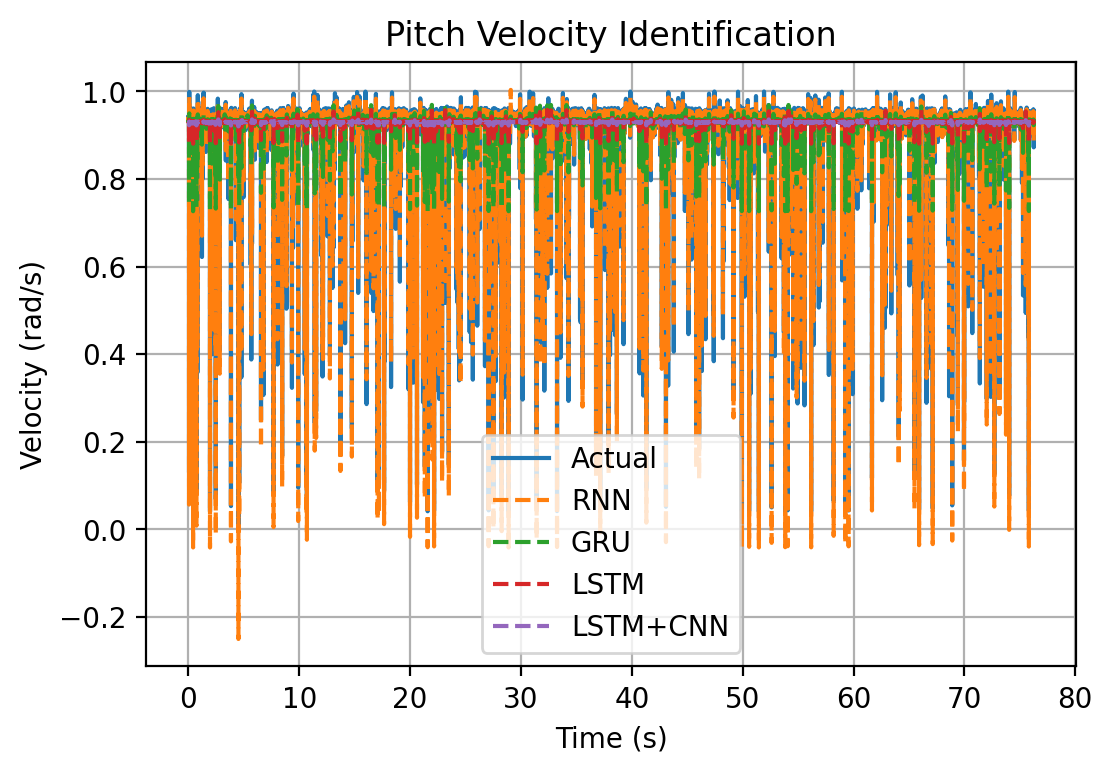

In [ ]:
plt.figure(dpi = 200)
plt.title('Pitch Velocity Identification')
plot_series(time_train, ytrain2[:,1], 'Actual')
# plot_series(time_test, np.squeeze(dnn_forecast[:,2]))
plot_series(time_train, rnn_forecast1[:,1], 'RNN', '--')
plot_series(time_train, gru_forecast1[:,1], 'GRU', '--')
plot_series(time_train, lstm_forecast1[:,1], 'LSTM', '--')
plot_series(time_train, lstmcnn_forecast1[:,1], 'LSTM+CNN', '--')
plt.ylabel('Velocity (rad/s)')
plt.legend()

##### Test Data

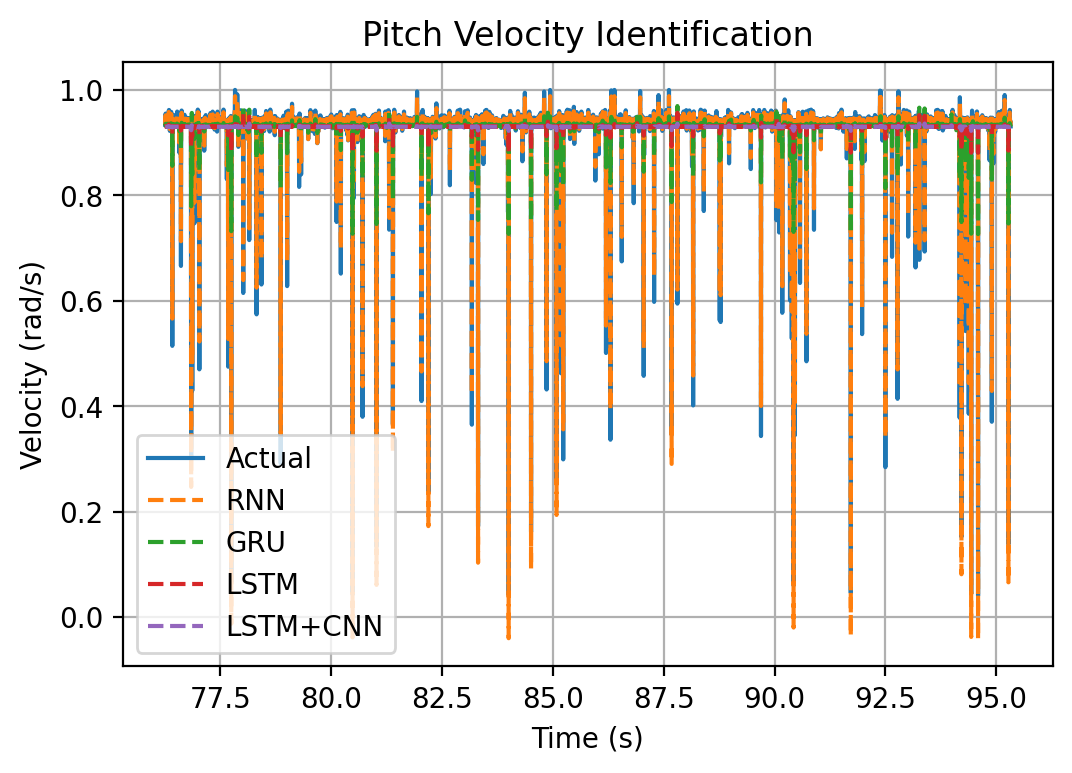

In [ ]:
plt.figure(dpi = 200)
plt.title('Pitch Velocity Identification')
plot_series(time_test, ytest2[:,1], 'Actual')
# plot_series(time_test, np.squeeze(dnn_forecast[:,1))
plot_series(time_test, rnn_forecast1_test[:,1], 'RNN', '--')
plot_series(time_test, gru_forecast1_test[:,1], 'GRU', '--')
plot_series(time_test, lstm_forecast1_test[:,1], 'LSTM', '--')
plot_series(time_test, lstmcnn_forecast1_test[:,1], 'LSTM+CNN', '--')
plt.ylabel('Velocity (rad/s)')
plt.legend()

#### Metrics

In [ ]:
# Training Data
# mae_dnn2 = tf.keras.metrics.mean_absolute_error(ytrain2[:,1], dnn_forecast[:,1]).numpy()
mae_rnn2 = tf.keras.metrics.mean_absolute_error(ytrain2[:,1], rnn_forecast1[:,1]).numpy()
mae_gru2 = tf.keras.metrics.mean_absolute_error(ytrain2[:,1], gru_forecast1[:,1]).numpy()
mae_lstm2 = tf.keras.metrics.mean_absolute_error(ytrain2[:,1], lstm_forecast1[:,1]).numpy()
mae_lstmcnn2 = tf.keras.metrics.mean_absolute_error(ytrain2[:,1], lstmcnn_forecast1[:,1]).numpy()

# mse_dnn2 = tf.keras.metrics.mean_squared_error(ytrain2[:,1], dnn_forecast[:,1]).numpy()
mse_rnn2 = tf.keras.metrics.mean_squared_error(ytrain2[:,1], rnn_forecast1[:,1]).numpy()
mse_gru2 = tf.keras.metrics.mean_squared_error(ytrain2[:,1], gru_forecast1[:,1]).numpy()
mse_lstm2 = tf.keras.metrics.mean_squared_error(ytrain2[:,1], lstm_forecast1[:,1]).numpy()
mse_lstmcnn2 = tf.keras.metrics.mean_squared_error(ytrain2[:,1], lstmcnn_forecast1[:,1]).numpy()

print('Training Data MAE'),
print(f'RNN : {mae_rnn2}, GRU : {mae_gru2}, LSTM : {mae_lstm2}, LSTM+CNN : {mae_lstmcnn2}'),
print('Training Data MSE'),
print(f'RNN : {mse_rnn2}, GRU : {mse_gru2}, LSTM : {mse_lstm2}, LSTM+CNN : {mse_lstmcnn2}'),

# Test Data
# mae_dnn_test2 = tf.keras.metrics.mean_absolute_error(ytest2[:,1], dnn_forecast_test[:,1]).numpy()
mae_rnn_test2 = tf.keras.metrics.mean_absolute_error(ytest2[:,1], rnn_forecast1_test[:,1]).numpy()
mae_gru_test2 = tf.keras.metrics.mean_absolute_error(ytest2[:,1], gru_forecast1_test[:,1]).numpy()
mae_lstm_test2 = tf.keras.metrics.mean_absolute_error(ytest2[:,1], lstm_forecast1_test[:,1]).numpy()
mae_lstmcnn_test2 = tf.keras.metrics.mean_absolute_error(ytest2[:,1], lstmcnn_forecast1_test[:,1]).numpy()

# mse_dnn_test2 = tf.keras.metrics.mean_squared_error(ytest2[:,1], dnn_forecast_test[:,1]).numpy()
mse_rnn_test2 = tf.keras.metrics.mean_squared_error(ytest2[:,1], rnn_forecast1_test[:,1]).numpy()
mse_gru_test2 = tf.keras.metrics.mean_squared_error(ytest2[:,1], gru_forecast1_test[:,1]).numpy()
mse_lstm_test2 = tf.keras.metrics.mean_squared_error(ytest2[:,1], lstm_forecast1_test[:,1]).numpy()
mse_lstmcnn_test2 = tf.keras.metrics.mean_squared_error(ytest2[:,1], lstmcnn_forecast1_test[:,1]).numpy()

print('Testing Data MAE'),
print(f'RNN : {mae_rnn_test2}, GRU : {mae_gru_test2}, LSTM : {mae_lstm_test2}, LSTM+CNN : {mae_lstmcnn_test2}'),
print('Testing Data MSE'),
print(f'RNN : {mse_rnn_test2}, GRU : {mse_gru_test2}, LSTM : {mse_lstm_test2}, LSTM+CNN : {mse_lstmcnn_test2}')

Training Data MAE
RNN : 0.0022649092134088278, GRU : 0.016125964000821114, LSTM : 0.01969207264482975, LSTM+CNN : 0.020425260066986084
Training Data MSE
RNN : 7.826790533727035e-05, GRU : 0.003802746534347534, LSTM : 0.005397568456828594, LSTM+CNN : 0.005825961474329233
Testing Data MAE
RNN : 0.0022920374758541584, GRU : 0.016197463497519493, LSTM : 0.019779371097683907, LSTM+CNN : 0.020522231236100197
Testing Data MSE
RNN : 6.514612323371693e-05, GRU : 0.003524321597069502, LSTM : 0.004993970040231943, LSTM+CNN : 0.005389563739299774


#### Yaw Velocity

##### Training Data

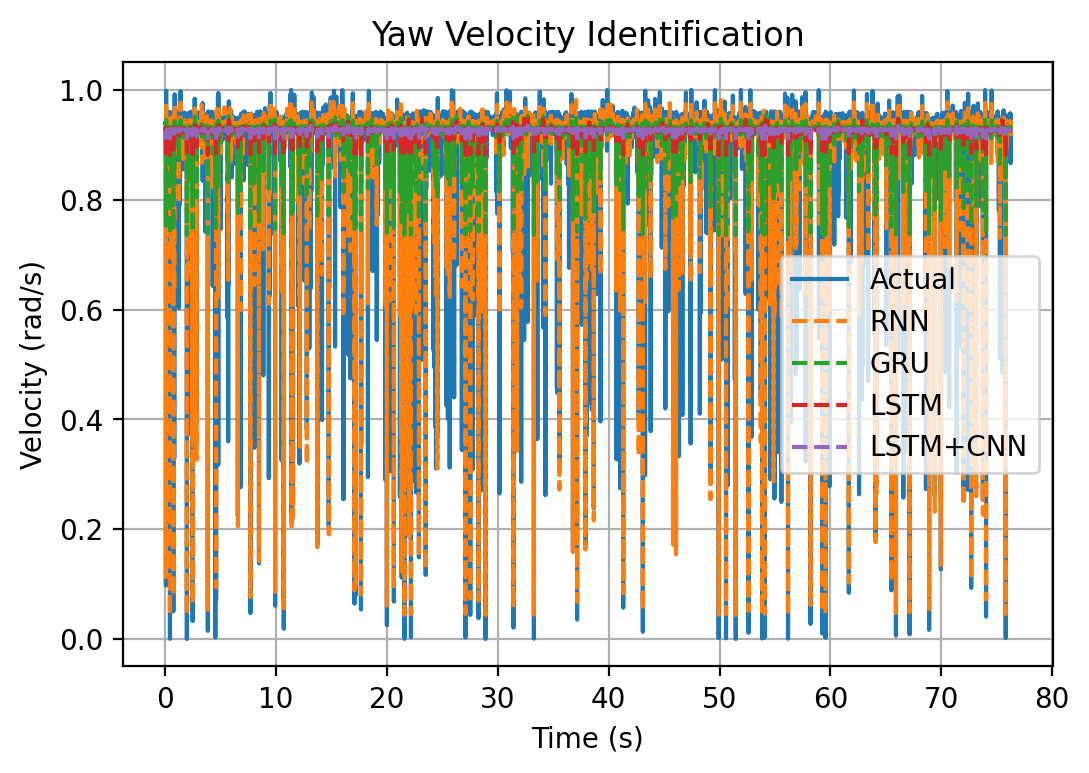

In [ ]:
plt.figure(dpi = 200)
plt.title('Yaw Velocity Identification')
plot_series(time_train, ytrain2[:,2], 'Actual')
# plot_series(time_test, np.squeeze(dnn_forecast[:,2]))
plot_series(time_train, rnn_forecast1[:,2], 'RNN', '--')
plot_series(time_train, gru_forecast1[:,2], 'GRU', '--')
plot_series(time_train, lstm_forecast1[:,2], 'LSTM', '--')
plot_series(time_train, lstmcnn_forecast1[:,2], 'LSTM+CNN', '--')
plt.ylabel('Velocity (rad/s)')
plt.legend()

##### Test Data

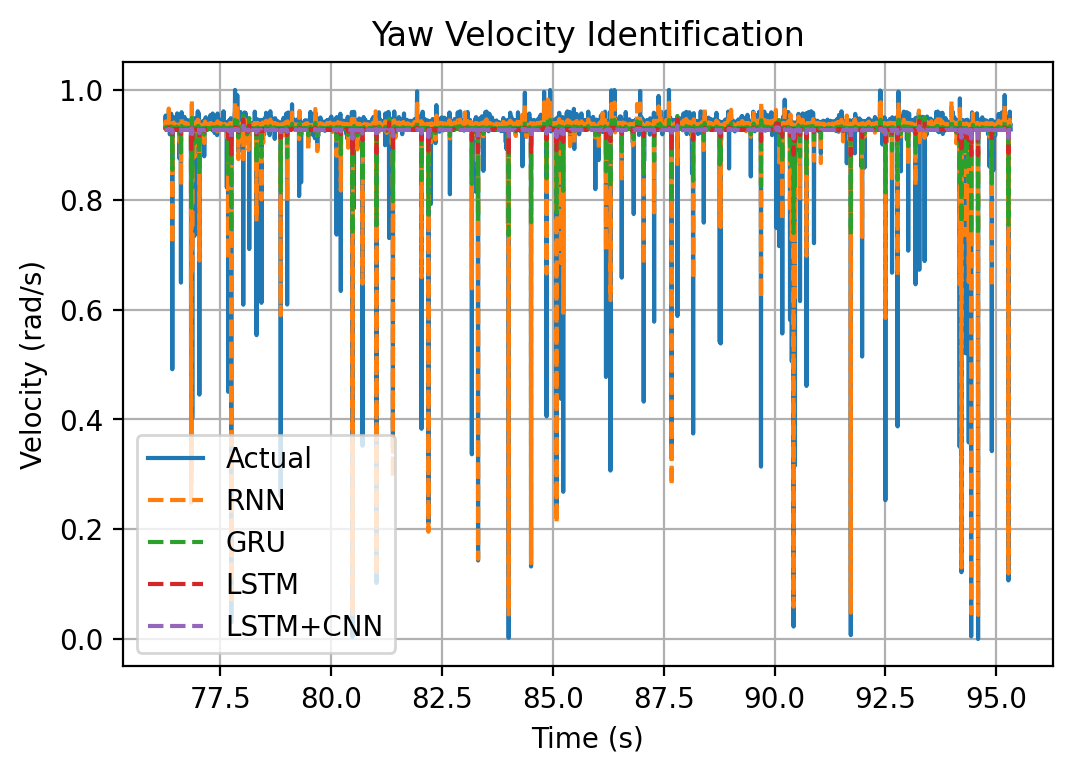

In [ ]:
plt.figure(dpi = 200)
plt.title('Yaw Velocity Identification')
plot_series(time_test, ytest2[:,2], 'Actual')
# plot_series(time_test, np.squeeze(dnn_forecast[:,2))
plot_series(time_test, rnn_forecast1_test[:,2], 'RNN', '--')
plot_series(time_test, gru_forecast1_test[:,2], 'GRU', '--')
plot_series(time_test, lstm_forecast1_test[:,2], 'LSTM', '--')
plot_series(time_test, lstmcnn_forecast1_test[:,2], 'LSTM+CNN', '--')
plt.ylabel('Velocity (rad/s)')
plt.legend()

#### Metrics

In [ ]:
# Training Data
# mae_dnn3 = tf.keras.metrics.mean_absolute_error(ytrain2[:,2], dnn_forecast[:,2]).numpy()
mae_rnn3 = tf.keras.metrics.mean_absolute_error(ytrain2[:,2], rnn_forecast1[:,2]).numpy()
mae_gru3 = tf.keras.metrics.mean_absolute_error(ytrain2[:,2], gru_forecast1[:,2]).numpy()
mae_lstm3 = tf.keras.metrics.mean_absolute_error(ytrain2[:,2], lstm_forecast1[:,2]).numpy()
mae_lstmcnn3 = tf.keras.metrics.mean_absolute_error(ytrain2[:,2], lstmcnn_forecast1[:,2]).numpy()

# mse_dnn3 = tf.keras.metrics.mean_squared_error(ytrain2[:,2], dnn_forecast[:,2]).numpy()
mse_rnn3 = tf.keras.metrics.mean_squared_error(ytrain2[:,2], rnn_forecast1[:,2]).numpy()
mse_gru3 = tf.keras.metrics.mean_squared_error(ytrain2[:,2], gru_forecast1[:,2]).numpy()
mse_lstm3 = tf.keras.metrics.mean_squared_error(ytrain2[:,2], lstm_forecast1[:,2]).numpy()
mse_lstmcnn3 = tf.keras.metrics.mean_squared_error(ytrain2[:,2], lstmcnn_forecast1[:,2]).numpy()

print('Training Data MAE'),
print(f'RNN : {mae_rnn3}, GRU : {mae_gru3}, LSTM : {mae_lstm3}, LSTM+CNN : {mae_lstmcnn3}'),
print('Training Data MSE'),
print(f'RNN : {mse_rnn3}, GRU : {mse_gru3}, LSTM : {mse_lstm3}, LSTM+CNN : {mse_lstmcnn3}'),

# Test Data
# mae_dnn_test3 = tf.keras.metrics.mean_absolute_error(ytest2[:,2], dnn_forecast_test[:,2]).numpy()
mae_rnn_test3 = tf.keras.metrics.mean_absolute_error(ytest2[:,2], rnn_forecast1_test[:,2]).numpy()
mae_gru_test3 = tf.keras.metrics.mean_absolute_error(ytest2[:,2], gru_forecast1_test[:,2]).numpy()
mae_lstm_test3 = tf.keras.metrics.mean_absolute_error(ytest2[:,2], lstm_forecast1_test[:,2]).numpy()
mae_lstmcnn_test3 = tf.keras.metrics.mean_absolute_error(ytest2[:,2], lstmcnn_forecast1_test[:,2]).numpy()

# mse_dnn_test3 = tf.keras.metrics.mean_squared_error(ytest2[:,2], dnn_forecast1_test[:,2]).numpy()
mse_rnn_test3 = tf.keras.metrics.mean_squared_error(ytest2[:,2], rnn_forecast1_test[:,2]).numpy()
mse_gru_test3 = tf.keras.metrics.mean_squared_error(ytest2[:,2], gru_forecast1_test[:,2]).numpy()
mse_lstm_test3 = tf.keras.metrics.mean_squared_error(ytest2[:,2], lstm_forecast1_test[:,2]).numpy()
mse_lstmcnn_test3 = tf.keras.metrics.mean_squared_error(ytest2[:,2], lstmcnn_forecast1_test[:,2]).numpy()

print('Testing Data MAE'),
print(f'RNN : {mae_rnn_test3}, GRU : {mae_gru_test3}, LSTM : {mae_lstm_test3}, LSTM+CNN : {mae_lstmcnn_test3}'),
print('Testing Data MSE'),
print(f'RNN : {mse_rnn_test3}, GRU : {mse_gru_test3}, LSTM : {mse_lstm_test3}, LSTM+CNN : {mse_lstmcnn_test3}')

Training Data MAE
RNN : 0.007826507091522217, GRU : 0.017150603234767914, LSTM : 0.020600974559783936, LSTM+CNN : 0.021119199693202972
Training Data MSE
RNN : 0.0009271031594835222, GRU : 0.00425673509016633, LSTM : 0.005876016337424517, LSTM+CNN : 0.006197425536811352
Testing Data MAE
RNN : 0.00808460358530283, GRU : 0.01725241169333458, LSTM : 0.02072124555706978, LSTM+CNN : 0.02124474011361599
Testing Data MSE
RNN : 0.000918582605663687, GRU : 0.0039564473554492, LSTM : 0.005453748628497124, LSTM+CNN : 0.00574784679338336
